In [1]:
import methylprep
import methylcheck as m
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path
latest = Path('/Volumes/LEGX/GEO/GSE69852/2021-08-04/')
prev = Path('/Volumes/LEGX/GEO/GSE69852/v111/') # actually v111 right now

```
>>> methylprep.__version__ '1.1.1' (but __Version__ not avail in this version)
>>> SDCS = methylprep.run_pipeline('.')
>>> x = SDCS[0]
>>> y = SDCS[1]
>>> dir(x)
['_SampleDataContainer__data_frame', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_postprocess', 'ctrl_green', 'ctrl_red', 'export', 'fg_green', 'fg_red', 'manifest', 'methylated', 'oob_controls', 'oob_green', 'oob_red', 'preprocess', 'process_all', 'process_beta_value', 'process_copy_number', 'process_m_value', 'raw_dataset', 'sample', 'unmethylated']
>>> x.fg_green.to_csv('x_fg_green.csv')
>>> x.fg_red.to_csv('x_fg_red.csv')
>>> x.oob_red.to_csv('x_oob_red.csv')
>>> x.oob_green.to_csv('x_oob_green.csv')
>>> x.methylated.to_csv('x_methylated.csv')
>>> x.methylated.data_frame.to_csv('x_methylated.csv')
>>> x.unmethylated.data_frame.to_csv('x_unmethylated.csv')
>>> x.ctrl_red.to_csv('x_ctrl_red.csv')
>>> x.ctrl_green.to_csv('x_ctrl_green.csv')
>>> list(x.methylated.data_frames.values())[0].to_csv('x_methylated_II.csv')
>>> list(x.methylated.data_frames.values())[1].to_csv('x_methylated_IG.csv')
>>> list(x.methylated.data_frames.values())[2].to_csv('x_methylated_IR.csv')
>>> list(x.unmethylated.data_frames.values())[0].to_csv('x_unmethylated_II.csv')
>>> list(x.unmethylated.data_frames.values())[1].to_csv('x_unmethylated_IG.csv')
>>> list(x.unmethylated.data_frames.values())[2].to_csv('x_unmethylated_IR.csv')
```

In [2]:
# ran once to use SDC in memory
#sdcs = methylprep.run_pipeline(latest, save_uncorrected=True)
#prevsdcs = methylprep.run_pipeline(prev, save_uncorrected=True) -- done using conda activate v133 then pickling the class SDC
sdcs = methylprep.run_pipeline(latest, save_uncorrected=True, sesame=False, low_memory=False)

INFO:methylprep.processing.pipeline:Running pipeline in: /Volumes/LEGX/GEO/GSE69852/2021-08-04
INFO:methylprep.models.sigset:Reading 2 IDATs from sample sheet
Reading IDATs: 100%|██████████| 2/2 [00:00<00:00, 8430.76it/s]
INFO:methylprep.files.manifests:Reading manifest file: HumanMethylation450_15017482_v1-2.CoreColumns.csv
Processing samples: 100%|██████████| 2/2 [00:52<00:00, 26.18s/it]
INFO:methylprep.processing.pipeline:[finished SampleDataContainer processing]
INFO:methylprep.processing.pipeline:saved noob_meth_values.pkl
INFO:methylprep.processing.pipeline:saved noob_unmeth_values.pkl
INFO:methylprep.processing.pipeline:saved meth_values.pkl
INFO:methylprep.processing.pipeline:saved unmeth_values.pkl
INFO:methylprep.processing.pipeline:saved sample_sheet_meta_data.pkl
INFO:methylprep.processing.pipeline:saved control_probes.pkl


# every probe subset matches exactly, if you round off the noob v.1.1.1 values and stack the oob meth+unmeth from oobR/oobG (and drop rs) to align with v1.1.1 shape.

diff is NOT because...
- probe subsets differ (they don't seem to differ, only the point at which oob gets stacked is confusing to compare
- idatDataset float16/32/64 makes no difference, except that float16 does lead to a spread of values showing up around the correct value, so float32 used throughout.

m133 = pd.read_pickle(Path(prev,'meth_values.pkl'))
u133 = pd.read_pickle(Path(prev,'unmeth_values.pkl'))
mnoob133 = pd.read_pickle(Path(prev,'noob_meth_values.pkl'))
unoob133 = pd.read_pickle(Path(prev,'noob_unmeth_values.pkl'))

m154 = pd.read_pickle(Path(latest,'meth_values.pkl'))
u154 = pd.read_pickle(Path(latest,'unmeth_values.pkl'))
mnoob154 = pd.read_pickle(Path(latest,'noob_meth_values.pkl'))
unoob154 = pd.read_pickle(Path(latest,'noob_meth_values.pkl'))

In [3]:
m111 = Path('/Volumes/LEGX/GEO/GSE69852/v111/')
xuIR = pd.read_csv(Path(m111, 'x_unmethylated_IR.csv')).set_index('IlmnID')
xuIG = pd.read_csv(Path(m111, 'x_unmethylated_IG.csv')).set_index('IlmnID')
xuII = pd.read_csv(Path(m111, 'x_unmethylated_II.csv')).set_index('IlmnID')
xmIR = pd.read_csv(Path(m111, 'x_methylated_IR.csv')).set_index('IlmnID')
xmIG = pd.read_csv(Path(m111, 'x_methylated_IG.csv')).set_index('IlmnID')
xmII = pd.read_csv(Path(m111, 'x_methylated_II.csv')).set_index('IlmnID')
x_oobG = pd.read_csv(Path(m111, 'x_oob_green.csv')).set_index('IlmnID')
x_oobR = pd.read_csv(Path(m111, 'x_oob_red.csv')).set_index('IlmnID')
x_meth = pd.read_csv(Path(m111, 'x_methylated.csv')).set_index('IlmnID')
x_unmeth = pd.read_csv(Path(m111, 'x_unmethylated.csv')).set_index('IlmnID')
x_fg_green = pd.read_csv(Path(m111, 'x_fg_green.csv')).set_index('IlmnID')
x_fg_red = pd.read_csv(Path(m111, 'x_fg_red.csv')).set_index('IlmnID')
x_ctrlG = pd.read_csv(Path(m111, 'x_ctrl_green.csv'))#.set_index('IlmnID')
x_ctrlR = pd.read_csv(Path(m111, 'x_ctrl_red.csv'))#.set_index('IlmnID')

/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (4,6) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


OK 0.0 II-meth: (mean_value vs Meth)
OK 0.0 II-unmeth: (mean_value vs Unmeth)
NOT OK -0.0012912957524368921 II-noob-meth: (noob vs noob_Meth)


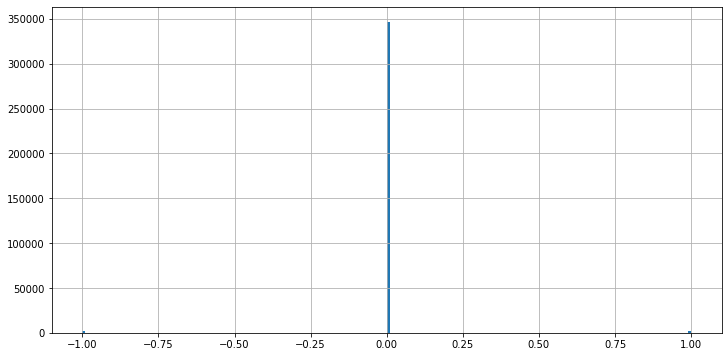

NOT OK -0.6755248031631033 II-noob-unmeth: (noob vs noob_Unmeth)


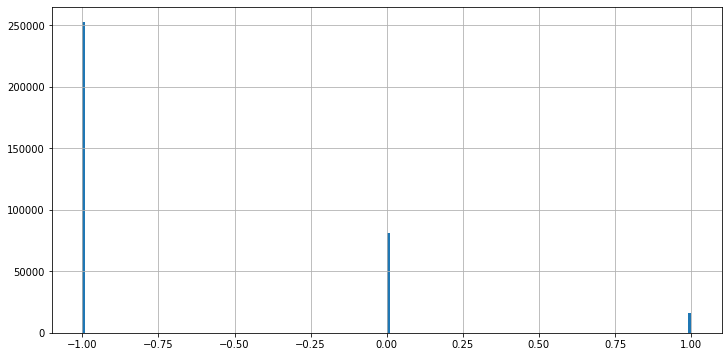

OK 0.0 IR-meth: (mean_value vs Meth)
OK 0.0 IR-unmeth: (mean_value vs Unmeth)
NOT OK -0.3912789980602554 IR-noob-meth: (noob vs noob_Meth)


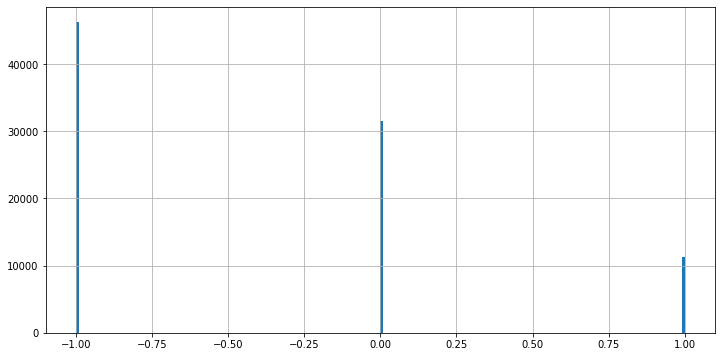

NOT OK -0.6655902766098198 IR-noob-unmeth: (noob vs noob_Unmeth)


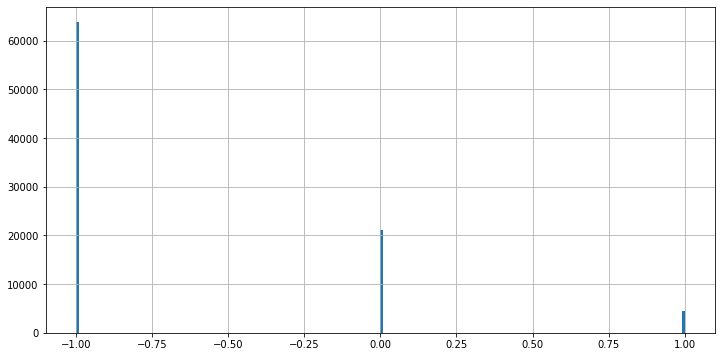

OK 0.0 IG-meth: (mean_value vs Meth)
OK 0.0 IG-unmeth: (mean_value vs Unmeth)
NOT OK 0.0017498757804229946 IG-noob-meth: (noob vs noob_Meth)


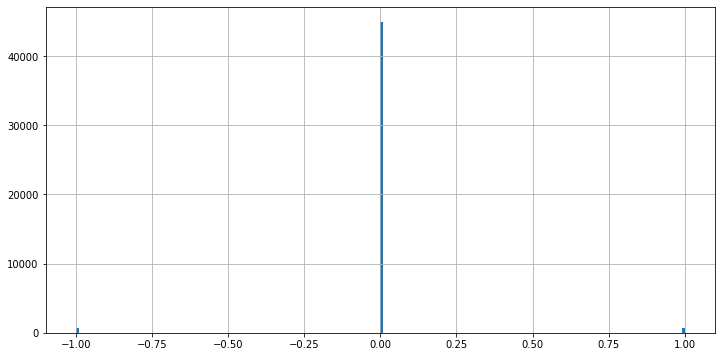

NOT OK -0.0006048953315042451 IG-noob-unmeth: (noob vs noob_Unmeth)


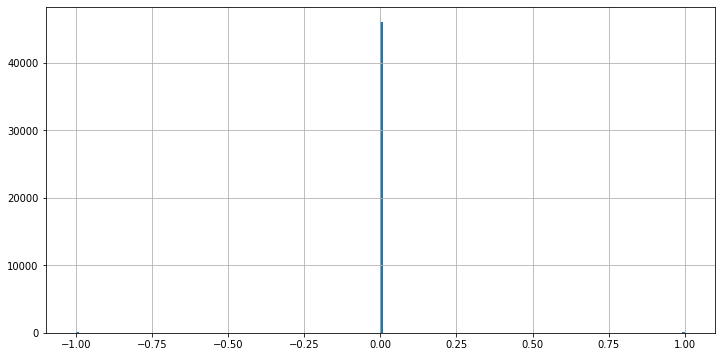

In [4]:
a = sdcs[0]; b = sdcs[1]
II = a.II[ ~a.II.index.str.startswith('rs') ]
IG = a.IG[ ~a.IG.index.str.startswith('rs') ]
IR = a.IR[ ~a.IR.index.str.startswith('rs') ]

def compare_parts(df1, df2, note, label1, label2):
    rows = df1[label1].shape[0] - df2[label2].shape[0]
    if rows != 0:
        print(f"NOT OK rows diff: {rows}")
    mean_diff = (df1[label1] - df2[label2]).mean()    
    if mean_diff != 0:
        print(f"NOT OK {mean_diff} {note}: ({label1} vs {label2})")
        (df1[label1] - df2[label2]).hist(bins=200, figsize=(12,6))
        plt.show()
    else:
        print(f"OK {mean_diff} {note}: ({label1} vs {label2})")
compare_parts(xmII.round(0), II, 'II-meth', 'mean_value', 'Meth')
compare_parts(xuII.round(0), II, 'II-unmeth', 'mean_value', 'Unmeth')
compare_parts(xmII.round(0), II, 'II-noob-meth', 'noob', 'noob_Meth')
compare_parts(xuII.round(0), II, 'II-noob-unmeth', 'noob', 'noob_Unmeth')

compare_parts(xmIR.round(0), IR, 'IR-meth', 'mean_value', 'Meth')
compare_parts(xuIR.round(0), IR, 'IR-unmeth', 'mean_value', 'Unmeth')
compare_parts(xmIR.round(0), IR, 'IR-noob-meth', 'noob', 'noob_Meth')
compare_parts(xuIR.round(0), IR, 'IR-noob-unmeth', 'noob', 'noob_Unmeth')

compare_parts(xmIG.round(0), IG, 'IG-meth', 'mean_value', 'Meth')
compare_parts(xuIG.round(0), IG, 'IG-unmeth', 'mean_value', 'Unmeth')
compare_parts(xmIG.round(0), IG, 'IG-noob-meth', 'noob', 'noob_Meth')
compare_parts(xuIG.round(0), IG, 'IG-noob-unmeth', 'noob', 'noob_Unmeth')

#pd.testing.assert_frame_equal(xmII[['mean_value']], II[['Meth']], check_dtype=False)

NOT OK rows diff: 46280
NOT OK 38.40756983300568 oobR: (mean_value vs Meth)


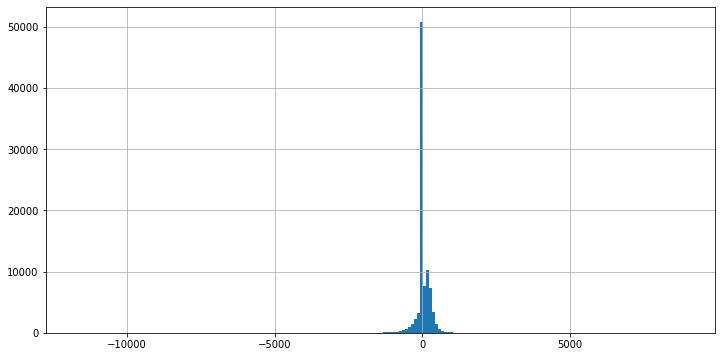

NOT OK rows diff: 89171
NOT OK 12.624822003206745 oobG: (mean_value vs Unmeth)


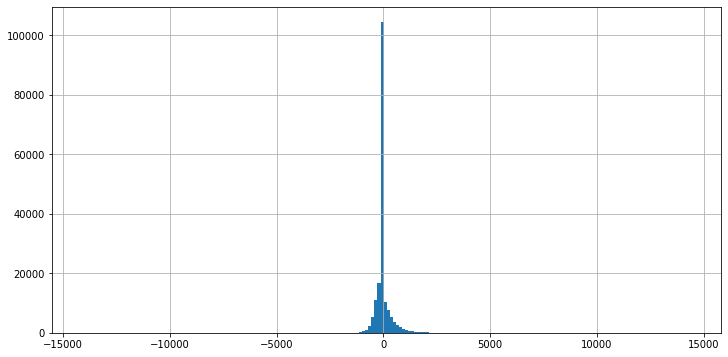

after stacking v1.5.4 oobR
OK 0.0 oobR: (mean_value vs Meth)


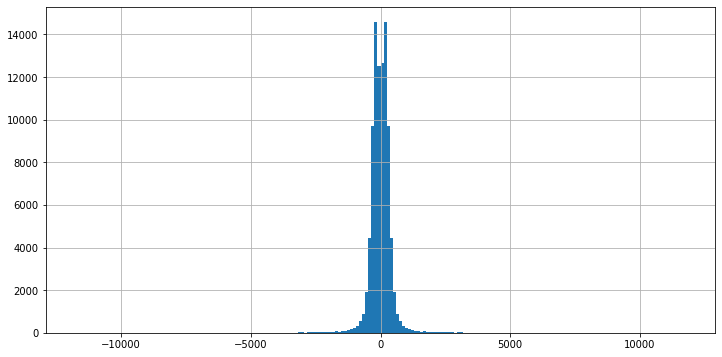

after stacking v1.5.4 oobG
OK 0.0 oobG: (mean_value vs Meth)


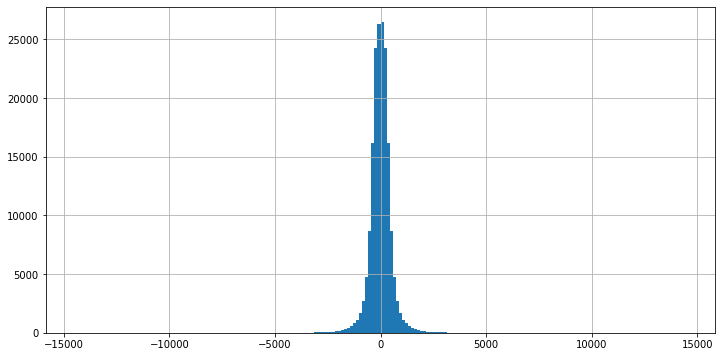

In [5]:
compare_parts(x_oobR.round(0), a.oobR, 'oobR', 'mean_value', 'Meth')
compare_parts(x_oobG.round(0), a.oobG, 'oobG', 'mean_value', 'Unmeth')

test = pd.concat([
    a.oobR[['AddressA_ID', 'AddressB_ID', 'Meth', 'used']], 
    a.oobR[['AddressA_ID', 'AddressB_ID', 'Unmeth', 'used']].rename(columns={'Unmeth':'Meth'})
], axis='rows')
test = test.loc[~test.index.str.startswith('rs')]
print('after stacking v1.5.4 oobR')
compare_parts(x_oobR, test, 'oobR', 'mean_value', 'Meth')
(x_oobR['mean_value'] - test['Meth']).hist(bins=200, figsize=(12,6))
plt.show()

stacked = pd.concat([
    a.oobG[['AddressA_ID', 'AddressB_ID', 'Meth', 'used']], 
    a.oobG[['AddressA_ID', 'AddressB_ID', 'Unmeth', 'used']].rename(columns={'Unmeth':'Meth'})
], axis='rows')
stacked = stacked.loc[~stacked.index.str.startswith('rs')]
print('after stacking v1.5.4 oobG')
compare_parts(x_oobG, stacked, 'oobG', 'mean_value', 'Meth')
(x_oobG['mean_value'] - stacked['Meth']).hist(bins=200, figsize=(12,6))
plt.show()


In [6]:
(x_oobG['mean_value'].sort_index() - stacked['Meth'].sort_index())[:50]

IlmnID
cg00000622     591.0
cg00000622    -591.0
cg00001245     -64.0
cg00001245      64.0
cg00001261     -68.0
cg00001261      68.0
cg00001510    -276.0
cg00001510     276.0
cg00001583     191.0
cg00001583    -191.0
cg00001594     259.0
cg00001594    -259.0
cg00001687     386.0
cg00001687    -386.0
cg00001747    -409.0
cg00001747     409.0
cg00001793     -91.0
cg00001793      91.0
cg00002028    -279.0
cg00002028     279.0
cg00002116     641.0
cg00002116    -641.0
cg00002719    -221.0
cg00002719     221.0
cg00002749    -368.0
cg00002749     368.0
cg00002769    -233.0
cg00002769     233.0
cg00002809    -269.0
cg00002809     269.0
cg00002837    -252.0
cg00002837     252.0
cg00003202    -454.0
cg00003202     454.0
cg00003298    -274.0
cg00003298     274.0
cg00003818     149.0
cg00003818    -149.0
cg00004082      -7.0
cg00004082       7.0
cg00004121     185.0
cg00004121    -185.0
cg00004883   -1575.0
cg00004883    1575.0
cg00005306     198.0
cg00005306    -198.0
cg00005740      52.0
cg0000

In [7]:
(x_oobG['mean_value'].sort_index() - a.oobG['Meth'].sort_index())[:50]

IlmnID
cg00000622     591.0
cg00000622       0.0
cg00001245       0.0
cg00001245      64.0
cg00001261     -68.0
cg00001261       0.0
cg00001510       0.0
cg00001510     276.0
cg00001583     191.0
cg00001583       0.0
cg00001594     259.0
cg00001594       0.0
cg00001687       0.0
cg00001687    -386.0
cg00001747       0.0
cg00001747     409.0
cg00001793       0.0
cg00001793      91.0
cg00002028       0.0
cg00002028     279.0
cg00002116     641.0
cg00002116       0.0
cg00002719       0.0
cg00002719     221.0
cg00002749    -368.0
cg00002749       0.0
cg00002769    -233.0
cg00002769       0.0
cg00002809    -269.0
cg00002809       0.0
cg00002837       0.0
cg00002837     252.0
cg00003202       0.0
cg00003202     454.0
cg00003298       0.0
cg00003298     274.0
cg00003818       0.0
cg00003818    -149.0
cg00004082       0.0
cg00004082       7.0
cg00004121       0.0
cg00004121    -185.0
cg00004883   -1575.0
cg00004883       0.0
cg00005306     198.0
cg00005306       0.0
cg00005740       0.0
cg0000